In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline
import time

Setting environment for AWS compute node


No vtk


In [2]:
from skimage.measure import find_contours
from scipy.ndimage.morphology import distance_transform_edt

In [4]:
from skimage.util import pad
from annotation_utilities import *
from registration_utilities import *

In [3]:
distance_accepted_um = 50.
distance_accepted_lossless = distance_accepted_um / XY_PIXEL_DISTANCE_LOSSLESS
distance_accepted_tb = distance_accepted_lossless / 32.

In [44]:
# for stack in ['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']:
for stack in ['MD603']:
    for sec in metadata_cache['valid_sections'][stack][:1]:
        m = DataManager.load_thumbnail_mask_v3(stack, prep_id=2, section=sec)
        contours = find_contour_points(m)[1]
        contours_valid = [cnt[cnt[:,0] >= 1] 
        for cnt in contours
        if len(contours) == 1]
        
#         m2 = np.zeros_like(m)
#         m2[cnt2[:,0], cnt2[:,1]] = 1

#         distance_to_contour = distance_transform_edt(~m2)

#         contour_prob_map = np.exp(-distance_to_contour**2/(2*distance_accepted_tb)**2)
#         contour_prob_map[contour_prob_map < 1e-2] = 0

#         contourMap_rootdir = create_if_not_exists('/oasis/projects/nsf/csd395/yuncong/CSHL_outerContourMap')
#         contourMap_dir = create_if_not_exists(contourMap_rootdir + '/%(stack)s/%(sec)04d/' % {'stack': stack, 'sec': sec})

#         img_fn = contourMap_dir + '/%(stack)s_%(sec)04d_denseScoremapThumbnail_outerContour.hdf' % {'stack': stack, 'sec': sec}

#         save_hdf(contour_prob_map, img_fn)

In [46]:
viz = np.zeros(m.shape, np.uint8)
cv2.polylines(viz, [contours_valid[0].astype(np.int)], isClosed=False, color=(255,0,0), thickness=3);

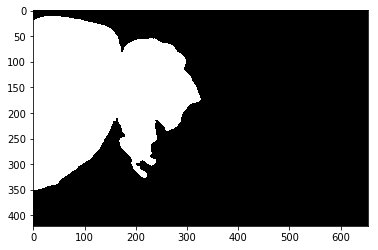

In [47]:
plt.imshow(m, cmap=plt.cm.gray);

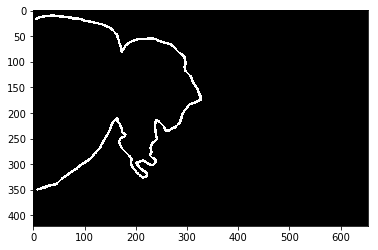

In [48]:
plt.imshow(viz, cmap=plt.cm.gray);

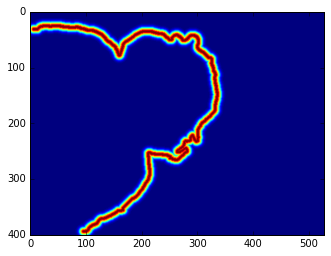

In [8]:
plt.imshow(contour_prob_map)